In [1]:
import pandas as pd
import numpy as np
import sys

In [2]:
sys.path.append('..')

In [3]:
from libs.Dataset import Dataset

In [4]:
df = Dataset().load_raw_data()

In [5]:
df.columns

Index(['Altitude', 'Mach #', 'Flight Regime', 'Power Setting (TRA)',
       'T2 Total temperature at fan inlet ｰR',
       'T24 Total temperature at LPC outlet ｰR',
       'T30 Total temperature at HPC outlet ｰR',
       'T50 Total temperature at LPT outlet ｰR',
       'P2 Pressure at fan inlet psia',
       'P15 Total pressure in bypass-duct psia',
       'P30 Total pressure at HPC outlet psia', 'Nf Physical fan speed rpm',
       'Nc Physical core speed rpm', 'epr Engine pressure ratio (P50/P2) --',
       'Ps30 Static pressure at HPC outlet psia',
       'phi Ratio of fuel flow to Ps30 pps/psi', 'NRf Corrected fan speed rpm',
       'NRc Corrected core speed rpm', 'BPR Bypass Ratio --',
       'farB Burner fuel-air ratio --', 'htBleed (Bleed Enthalpy)',
       'Nf_dmd Demanded fan speed rpm',
       'PCNfR_dmd Demanded corrected fan speed rpm',
       'W31 HPT coolant bleed lbm/s', 'W32 LPT coolant bleed lbm/s',
       'is_train', 'duration', 'engine_dead', 'dead_duration', 'engine_

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = sns.color_palette('hls', 8)

In [7]:
engine_gp = df.groupby('engine_no')
engine_list = engine_gp['engine_no'].first()

# Flight Regime rate

In [8]:
# Flight regeme num each engine
regime_list = [1, 2, 3, 4, 5, 6]
regime_df = pd.DataFrame(index=engine_list)
for i in regime_list:
    regime_df['regime_%i' % i] = 0

for eg_i in engine_list:
    df_i = df[df['engine_no'] == eg_i]
    dead_i = len(df_i)
    for i in regime_list:
        regime_df.loc[eg_i, ('regime_%s' % i)] = (df_i['Flight Regime'] == i).sum()/dead_i

In [9]:
regime_df.head()

,regime_1,regime_2,regime_3,regime_4,regime_5,regime_6
engine_no,,,,,,
Test_Engine_001,0.155172,0.155172,0.172414,0.137931,0.172414,0.206897
Test_Engine_002,0.142857,0.142857,0.127551,0.153061,0.178571,0.255102
Test_Engine_003,0.128000,0.128000,0.176000,0.128000,0.176000,0.264000
Test_Engine_004,0.080000,0.200000,0.200000,0.180000,0.100000,0.240000
Test_Engine_005,0.122699,0.165644,0.147239,0.171779,0.171779,0.220859


In [10]:
regime_df.index

Index(['Test_Engine_001', 'Test_Engine_002', 'Test_Engine_003',
       'Test_Engine_004', 'Test_Engine_005', 'Test_Engine_006',
       'Test_Engine_007', 'Test_Engine_008', 'Test_Engine_009',
       'Test_Engine_010',
       ...
       'Train_Engine_251', 'Train_Engine_252', 'Train_Engine_253',
       'Train_Engine_254', 'Train_Engine_255', 'Train_Engine_256',
       'Train_Engine_257', 'Train_Engine_258', 'Train_Engine_259',
       'Train_Engine_260'],
      dtype='object', name='engine_no', length=360)

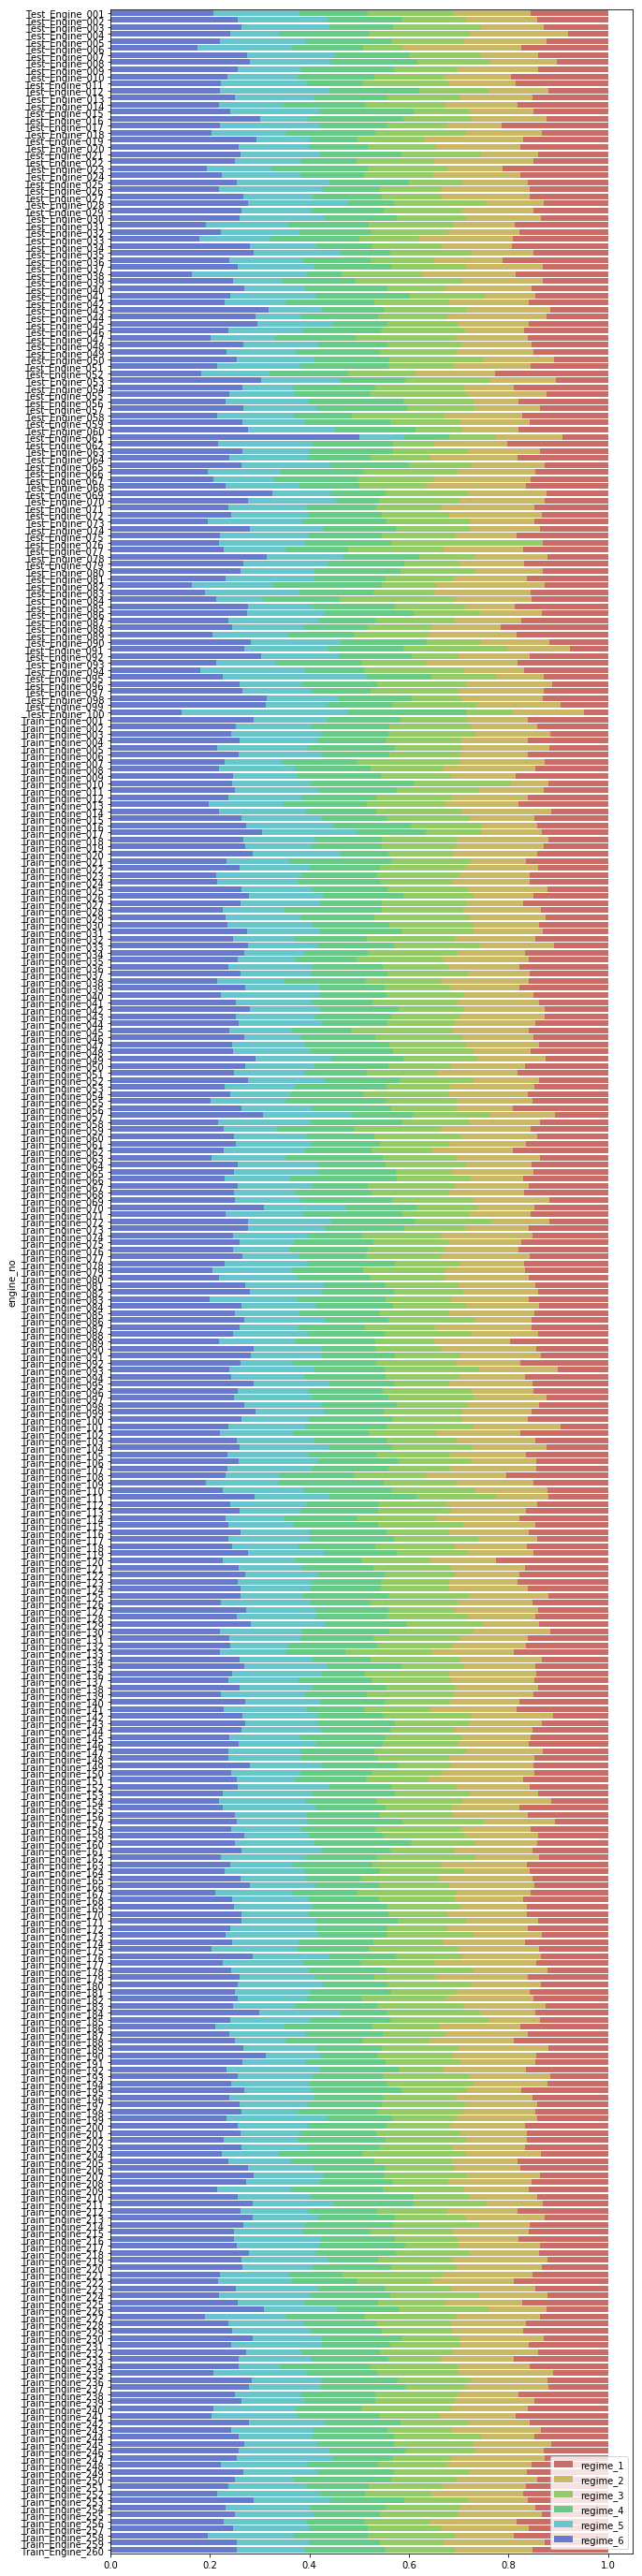

In [40]:
f, ax = plt.subplots(figsize=(10, 50))

stack = np.array([1]*len(regime_df))
for i in regime_list:
    sns.barplot(x=stack, y=regime_df.index,
               color=cols[i-1], label='regime_%s' % i)
    stack = stack - regime_df['regime_%s' % i].values
ax.legend()

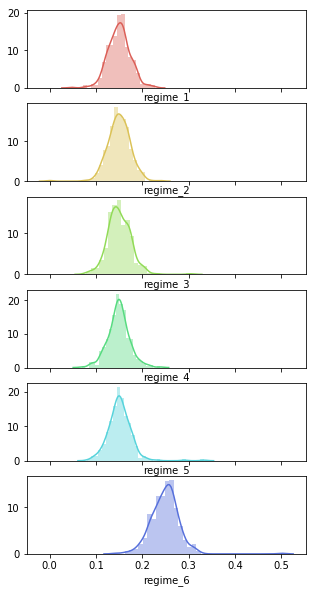

In [38]:
f, axes = plt.subplots(6, 1, figsize=(5, 10), sharex=True)

for i in regime_list:
    x = regime_df['regime_%s' % i]
    sns.distplot(x, ax=axes[i-1], color=cols[i-1])

# Power Setting rate

In [44]:
set_list = df['Power Setting (TRA)'].unique()

engine_df = pd.DataFrame(index=engine_list)
for i in set_list:
    engine_df['PS_%i' % i] = 0

for eg_i in engine_list:
    df_i = df[df['engine_no'] == eg_i]
    dead_i = len(df_i)
    for i in set_list:
        engine_df.loc[eg_i, ('PS_%s' % i)] = (df_i['Power Setting (TRA)'] == i).sum()/dead_i

In [46]:
engine_df.head()

,PS_100,PS_60
engine_no,,
Test_Engine_001,0.862069,0.137931
Test_Engine_002,0.846939,0.153061
Test_Engine_003,0.872000,0.128000
Test_Engine_004,0.820000,0.180000
Test_Engine_005,0.828221,0.171779


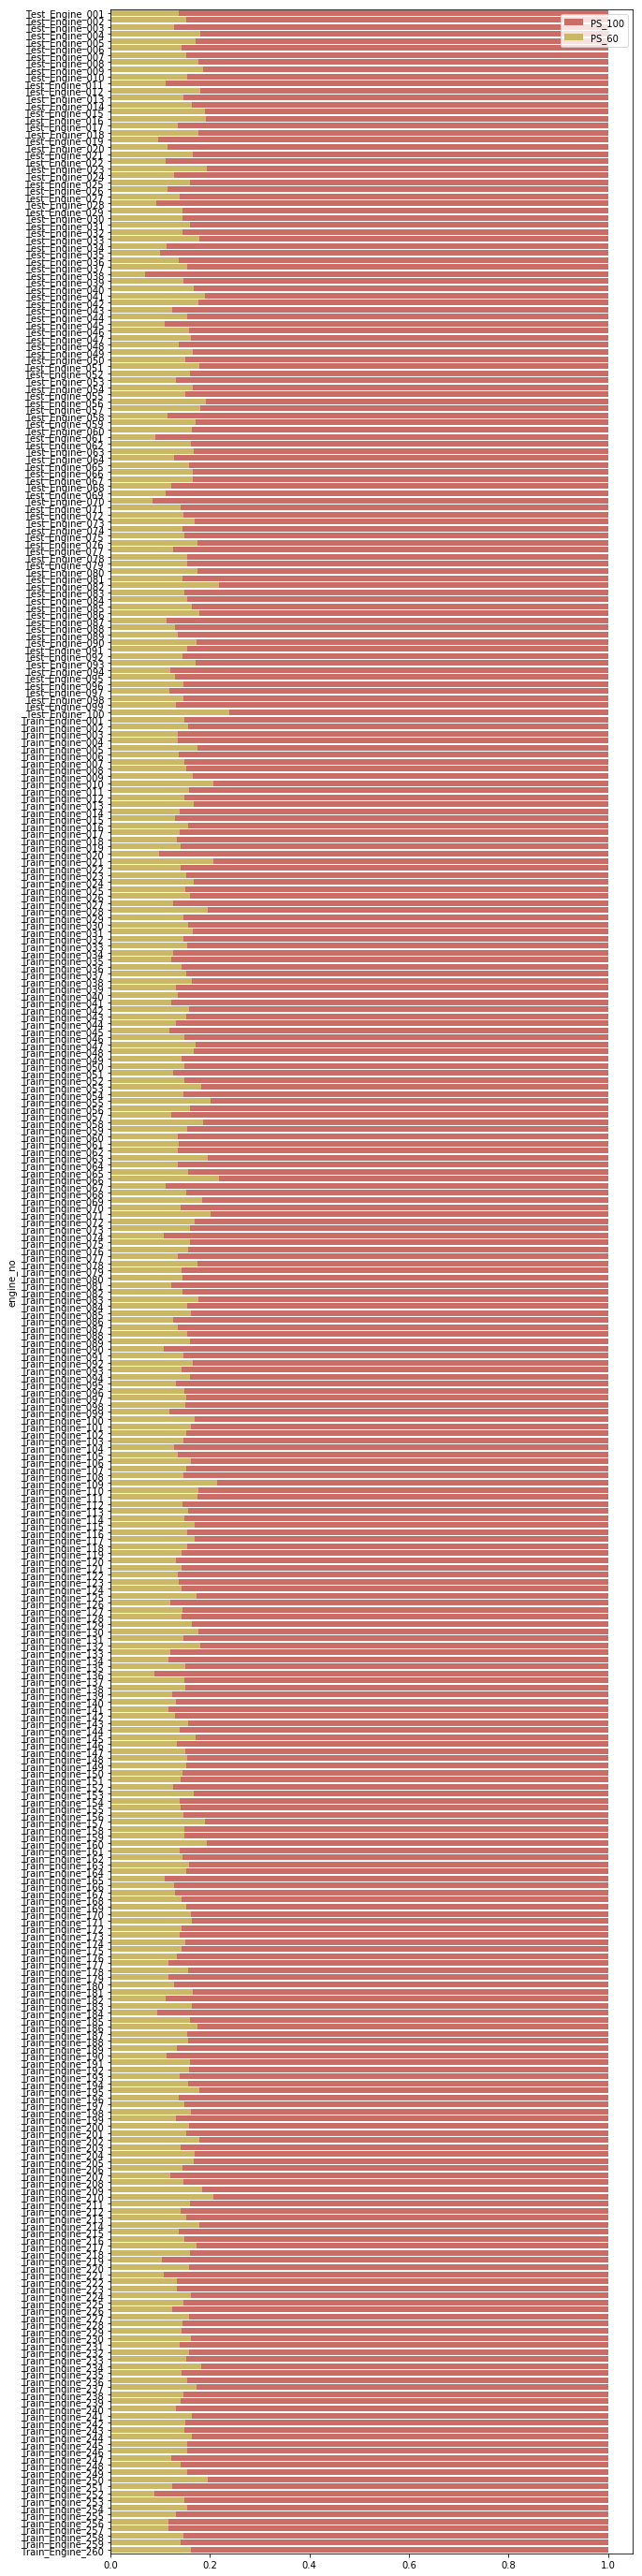

In [50]:
f, ax = plt.subplots(figsize=(10, 50))

stack = np.array([1]*len(engine_df))
for i, set_i in enumerate(set_list):
    sns.barplot(x=stack, y=engine_df.index,
               color=cols[i], label='PS_%s' % set_i)
    stack = stack - engine_df['PS_%s' % set_i].values
ax.legend()

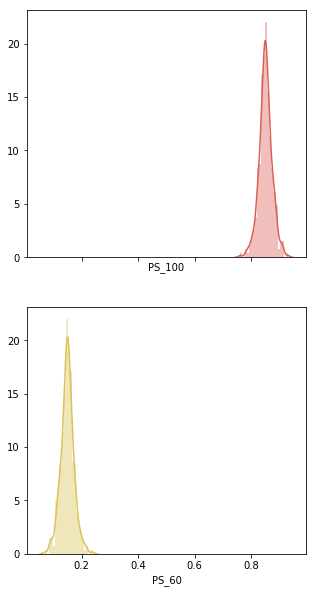

In [53]:
f, axes = plt.subplots(2, 1, figsize=(5, 10), sharex=True)

for i,set_i in enumerate(set_list):
    x = regime_df['PS_%s' % set_i]
    sns.distplot(x, ax=axes[i], color=cols[i])

# Serch engine difference

/home/naoto/miniconda3/envs/isid_linux/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/naoto/miniconda3/envs/isid_linux/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


TypeError: unsupported operand type(s) for /: 'str' and 'int'

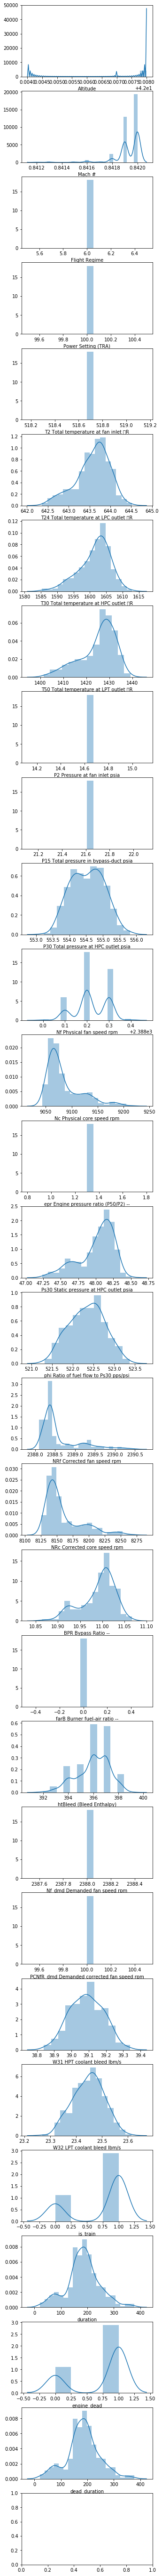

In [33]:
f, axes = plt.subplots(len(df.columns), 1, figsize=(5, 100))

for i, col_i in enumerate(list(df.columns)):
    x = engine_gp[col_i].max()
    sns.distplot(x, ax=axes[i], label=col_i)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

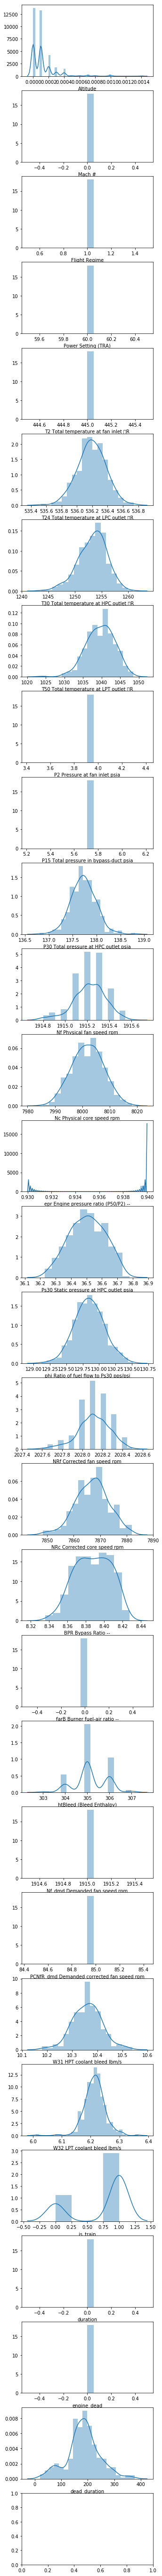

In [34]:
f, axes = plt.subplots(len(df.columns), 1, figsize=(5, 100))

for i, col_i in enumerate(list(df.columns)):
    x = engine_gp[col_i].min()
    sns.distplot(x, ax=axes[i], label=col_i)

DataError: No numeric types to aggregate

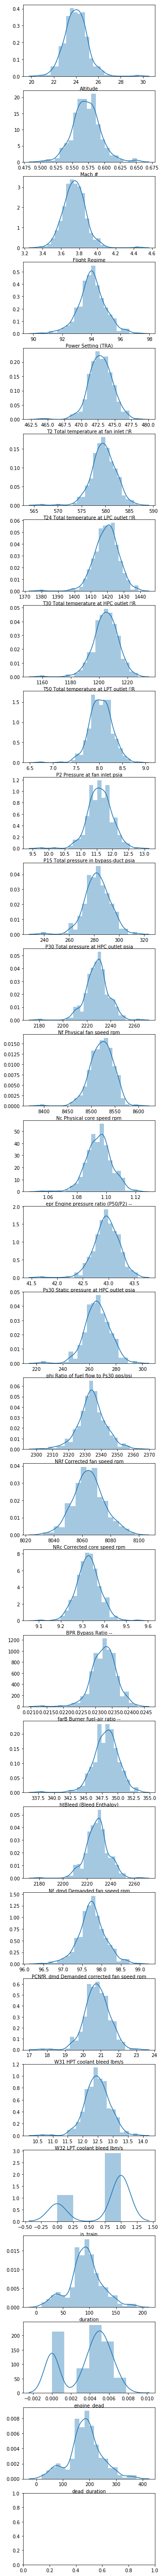

In [35]:
f, axes = plt.subplots(len(df.columns), 1, figsize=(5, 100))

for i, col_i in enumerate(list(df.columns)):
    x = engine_gp[col_i].mean()
    sns.distplot(x, ax=axes[i], label=col_i)